In [262]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

In [242]:
#loading and underestanding the data set
df = pd.read_csv(r"C:\Users\morte\Downloads\practical_application_II_starter (1)\data\vehicles.csv")
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [243]:
#Cleaning the data set
df = df.dropna()
# Convert 'cylinders' column to numeric using error handling for non-string values
df['cylinders'] = df['cylinders'].astype(str)  # Convert to string first
df['cylinders'] = df['cylinders'].str.extract(r'(\d+)')[0]  # Extract numeric parts
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce').fillna(0).astype(int)  # Replace NaN with 0

# Preprocessing
# Convert categorical variables to numerical
for column in ['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status', 
               'transmission', 'drive', 'size', 'type', 'paint_color', 'state']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Drop the 'id' and 'VIN' columns before calculating correlation
df.drop(columns=['id', 'VIN'], inplace=True)
df = df[df['price'] != 0]
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,29,4000,2002.0,38,1650,0,4,2,155000.0,0,0,1,0,9,1,1
219,29,2500,1995.0,4,396,1,6,2,110661.0,0,0,2,2,9,10,1
268,29,9000,2008.0,25,3199,0,4,2,56700.0,0,0,2,0,2,10,1
337,29,8950,2011.0,13,1992,0,6,2,164000.0,0,0,1,1,10,10,1
338,29,4000,1972.0,26,784,1,6,2,88100.0,0,0,2,1,3,9,1


Mean Squared Error: 113464249.12564883
R^2 Score: 0.35151743013801995


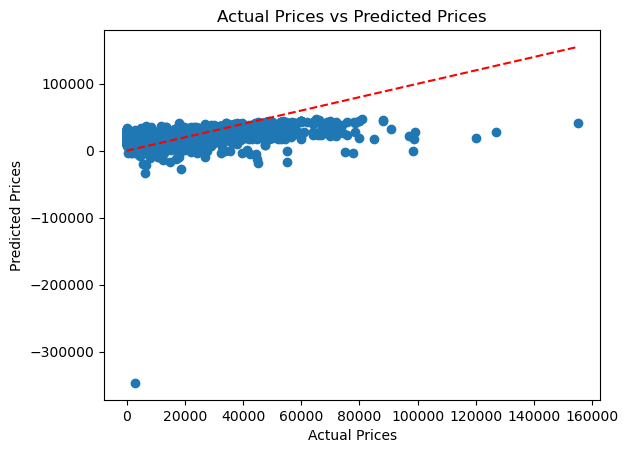

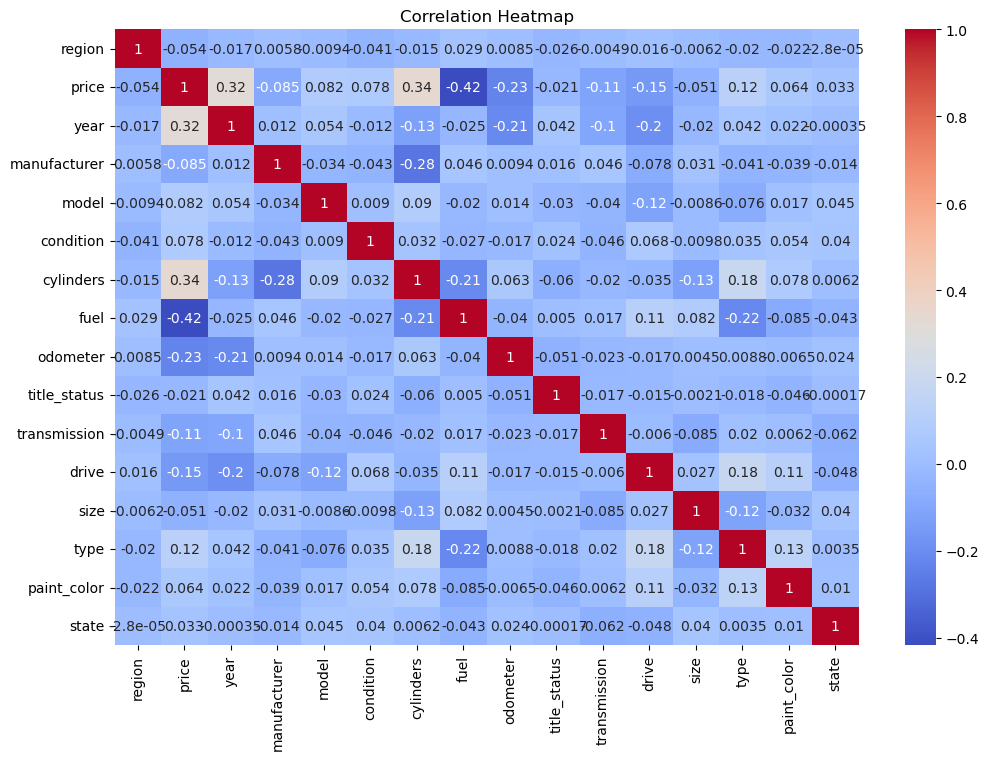

In [244]:
# Selecting features and target variable
X = df.drop(columns=['price'])  
y = df['price']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Correlation heatmap
correlation = df.corr()

# Ploting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Mean Squared Error: 37333684.376836464
R^2 Score: 0.6736829741793415


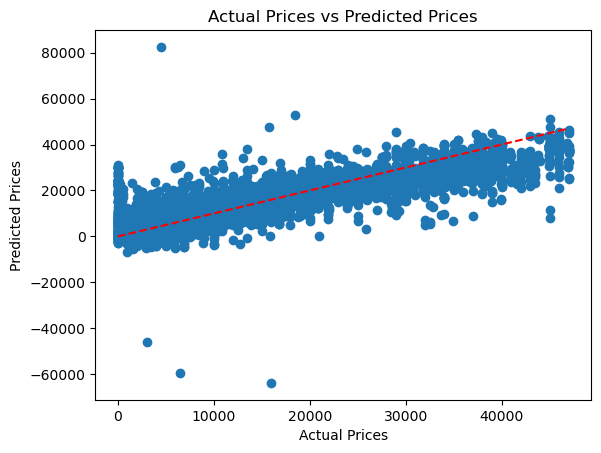

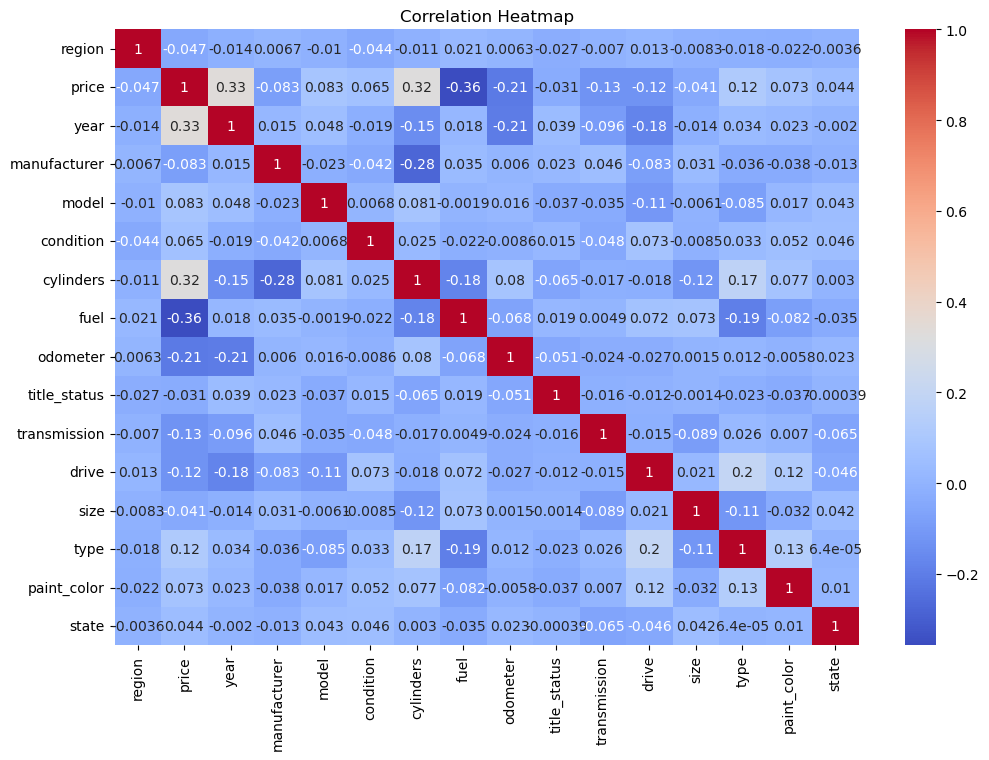

In [246]:
# the correlation figure shows that there are outlayers in the price; now, we update the code to remove outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Selecting features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding Polynomial Features (degree 2 for interaction)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Creating a Ridge regression model 
model = Ridge(alpha=1.0)  
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Correlation heatmap
correlation = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Mean Squared Error: 31336766.125010505
R^2 Score: 0.6790377239599592


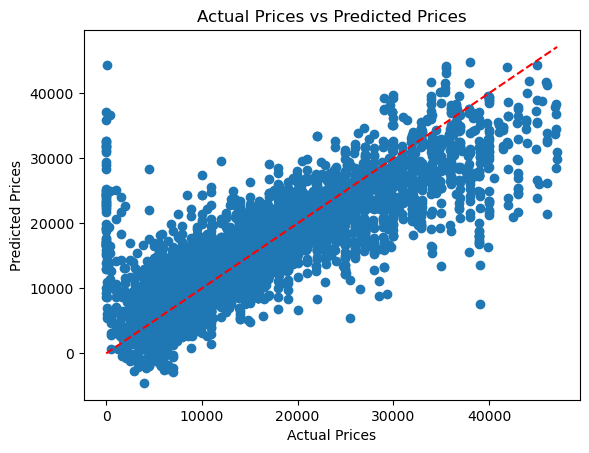

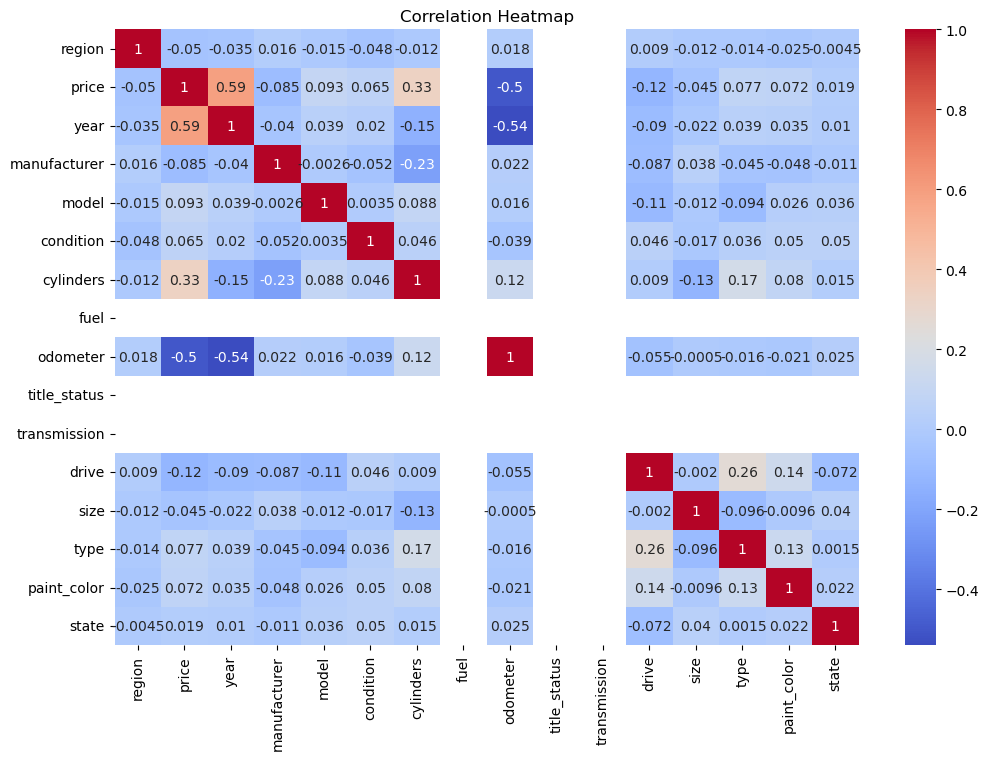

In [248]:
# Updating the code with identifing feature columns
feature_columns = df.columns.difference(['price'])

# Removing outliers from feature columns using the same IQR method
for feature in feature_columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[feature] >= (Q1 - 1.5 * IQR)) & (df[feature] <= (Q3 + 1.5 * IQR))]

# Selecting features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding Polynomial Features (degree 2 for interaction)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Creating a Ridge regression model
model = Ridge(alpha=1.0)  
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Correlation heatmap
correlation = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Mean Squared Error: 18144111.42405035
R^2 Score: 0.7781549662421976


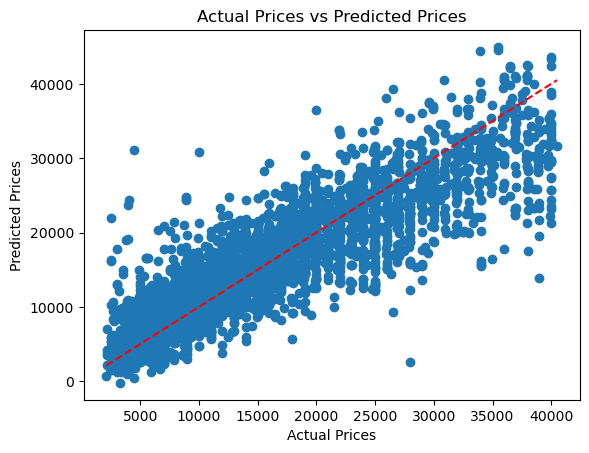

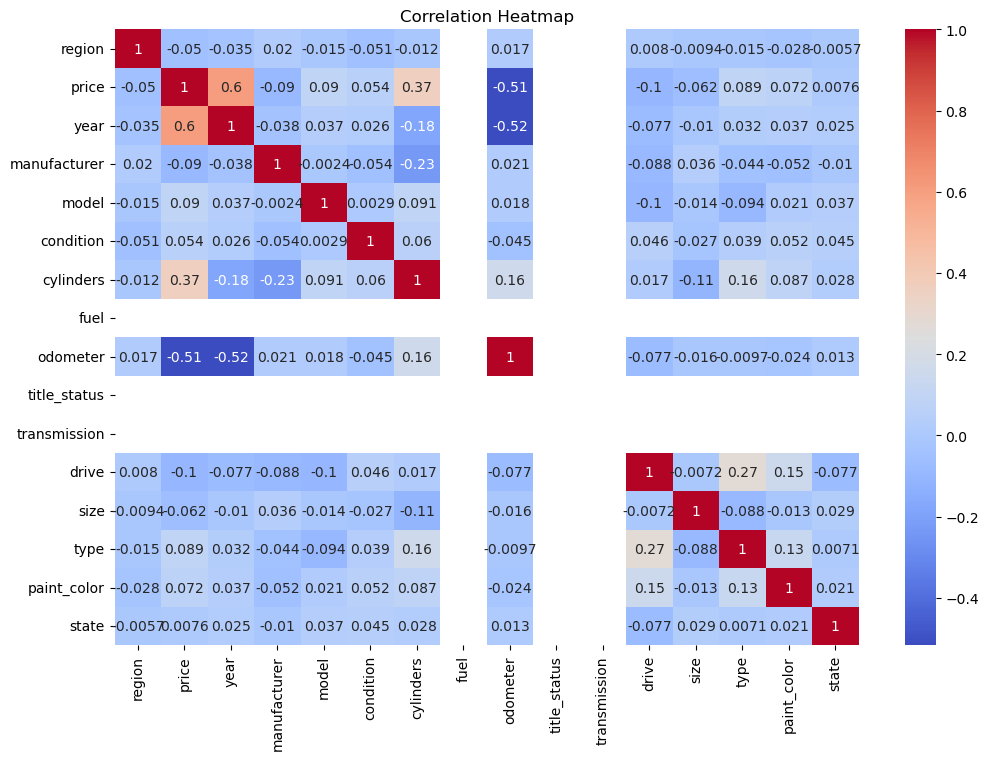

In [250]:
#Removing the inconsisting data near prices close to zero
# Keep only rows where the price is above $2000
df = df[df['price'] > 2000]

# Removing outliers from the price column using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Identifing feature columns (excluding the target variable 'price')
feature_columns = df.columns.difference(['price'])

# Removing outliers from feature columns using the same IQR method
for feature in feature_columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[feature] >= (Q1 - 1.5 * IQR)) & (df[feature] <= (Q3 + 1.5 * IQR))]

# Selecting features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding Polynomial Features (degree 2 for interaction)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
model = Ridge(alpha=1.0)  
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Correlation heatmap
correlation = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Selected Features Based on Ridge Coefficients:
['year' 'manufacturer' 'condition' 'cylinders' 'odometer' 'drive'
 'paint_color' 'state' 'year^2' 'year model' 'year condition'
 'year cylinders' 'year odometer' 'year drive' 'model^2' 'model cylinders'
 'cylinders^2' 'cylinders odometer' 'cylinders drive' 'odometer type'
 'drive^2' 'drive type' 'size^2' 'type paint_color' 'paint_color^2']
Mean Squared Error after feature selection: 17403820.444903113
R^2 Score after feature selection: 0.7671585228635251


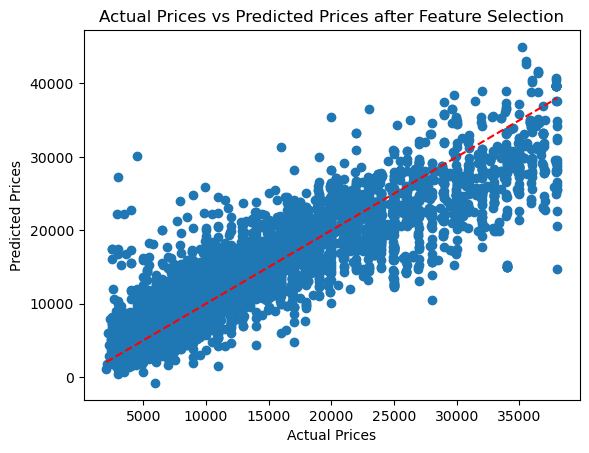

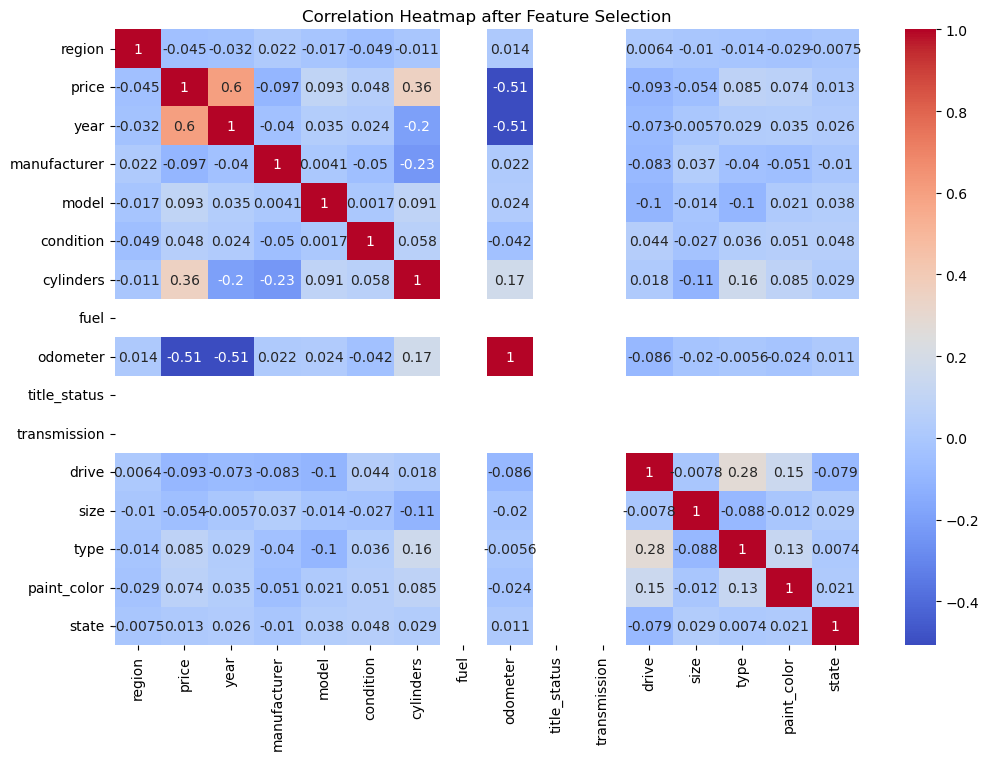

In [260]:
# Feature selection
#Keeping only rows where the price is above $2000
df = df[df['price'] > 2000]

# Removing outliers from the price column using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Identifing feature columns (excluding the target variable 'price')
feature_columns = df.columns.difference(['price'])

# Removing outliers from feature columns using the same IQR method
for feature in feature_columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[feature] >= (Q1 - 1.5 * IQR)) & (df[feature] <= (Q3 + 1.5 * IQR))]

# Selecting features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding Polynomial Features (degree 2 for interaction)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Using Ridge regression to identify important features
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_poly, y)

# Calculating the feature importance based on the coefficients
importance = np.abs(ridge_model.coef_)
# Calculating a threshold for selecting important features
threshold = np.mean(importance)

# Getting feature names from PolynomialFeatures
feature_names = poly.get_feature_names_out(X.columns)

# Selecting features based on the threshold
selected_features = feature_names[importance > threshold]
print("Selected Features Based on Ridge Coefficients:")
print(selected_features)

# Creating a reduced dataset with only selected features
important_indices = np.where(importance > threshold)[0]

# Creating a new dataset with only selected features
X_reduced = X_poly[:, important_indices]

# Spliting the updated dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Creating and fit the new Ridge regression model with selected features
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error after feature selection: {mse}')
print(f'R^2 Score after feature selection: {r2}')

# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices after Feature Selection")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Correlation heatmap
correlation = df.corr()

# Plot the correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap after Feature Selection')
plt.show()

In [264]:
# Performing a cross-validation
cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')  

# Converting negative MSE scores to positive values
cv_rmse = np.sqrt(-cv_scores)

# Print cross-validated results
print("Cross-Validated RMSE for each fold:", cv_rmse)
print("Mean RMSE from Cross-Validation:", np.mean(cv_rmse))
print("Standard Deviation of RMSE from Cross-Validation:", np.std(cv_rmse))

# Fit the model on the entire dataset
model.fit(X_poly, y)

# Final predictions on the full dataset 
y_pred = model.predict(X_poly)

# Evaluating the final model on the full dataset
final_mse = mean_squared_error(y, y_pred)
final_r2 = r2_score(y, y_pred)

print(f'Final Mean Squared Error: {final_mse}')
print(f'Final R^2 Score: {final_r2}')

Cross-Validated RMSE for each fold: [4436.59095322 4284.46868885 4008.09722761 4009.76744947 4274.82288582]
Mean RMSE from Cross-Validation: 4202.749440993856
Standard Deviation of RMSE from Cross-Validation: 168.33656940118436
Final Mean Squared Error: 17017567.98029267
Final R^2 Score: 0.7772496350501601
